# Исследование объявлений о продаже квартир.

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы:
 - 1) Открытие файла с данными и изучение общуей информации.
 - 2) Предобработка данных.
 - 3) Посчитаем и добавим в таблицу необходимые столбцы для нашего работы.
 - 4) Исследовательский анализ данных.
 - 5) Общий вывод.

###### Данные:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### 1) Открытие файла с данными и изучение общуей информации. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 30)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(df)

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0                2.

In [2]:
print(df.describe())

       total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Открыв фаил с данным заметил следующее:
1)Во-многих столбцах присутствуют пропуски.
2)Так же проверив каждый столбец пришел к выводу что в некоторых столбцах есть аномальные значения.
3)Некоторые столбцы имеют не удобный (для расчетов) тип данных.Например столбец  'first_day_exposition'

Не значительная поправка: Предварительно увеличил количетсво показываемых столбцов,так как Jupyter по умолчанию показывает только 20,что в свою очередь мешает продуктивно оценивать данные.

###  2) Предобработка данных.

заменим пропуски в столбце 'balcony' на значени '0', так как можно предположить что в этих квартирах их просто нет.

In [4]:
df['balcony'] = df['balcony'].fillna(0)

заменим пропуски в столбце 'airports_nearest' на медиану,так как наличиие пропусков нельзя списать на отсутвие аэропорта.

In [5]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())

заменим пропуски в столбце 'ceiling_height' на медиану и удалим строки с аномальными значениями в столбце 'ceiling_height',оставив только те значения, которые подходят нашему уcловию

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df = df[(df['ceiling_height'] >= 2.5) & (df['ceiling_height'] <= 5)]

Пропуски в столбце 'days_exposition' не станем заменять, потому что скорее всего пропуски есть в тех объявлениях, где квартиры еще не проданы.
Так же не станем заполнять пропуски в таких столбцах как'parks_around3000','ponds_around3000','parks_nearest','ponds_nearest', потому что скорее всего рядом (в пределах 3000 м) с этими квартирами нет рядом парков и водоемов. 

Удалим строки где есть пропуски, но их не так много,а именно в столбцах 'floors_total','floors_total','living_area','kitchen_area' по той причине что их крайне мало.Это сделать целесообразнее, нежели пытаться заполнить значениями, что может повлиять на результат нашего исследования.

In [7]:
df.dropna(subset = ['floors_total','locality_name','living_area','kitchen_area'], inplace = True)

Так же заменим аномально большие/маленькие значения в столбце 'kitchen_area' на медиану.
Сделам это из-за того что в этом столбце присутствуют в небольшом количетсве аномально большие значение (412(м2)) и аномально маленькие значения (1.3(м2)).Сделаем это при помощи функции.

In [8]:
median_kitchen_area = df['kitchen_area'].median()

def kitchen_area_normal(area):
        if 5.0 > area > 50.0:
            return median_kitchen_area
        else:
            return area
df['kitchen_area'] = df['kitchen_area'].apply(kitchen_area_normal)

заменим все пропуски в столбце 'is_apartment' на значения False

In [9]:
df['is_apartment'] = df['is_apartment'].fillna(value = False)

Переведем данные в столбце 'first_day_exposition' в формат даты,для того чтобы можно было с ними делать вычислительные операции.

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')

Заменим пропуски в столбце 'cityCenters_nearest' на медиану

In [11]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20813 entries, 0 to 23698
Data columns (total 22 columns):
total_images            20813 non-null int64
last_price              20813 non-null float64
total_area              20813 non-null float64
first_day_exposition    20813 non-null datetime64[ns]
rooms                   20813 non-null int64
ceiling_height          20813 non-null float64
floors_total            20813 non-null float64
living_area             20813 non-null float64
floor                   20813 non-null int64
is_apartment            20813 non-null bool
studio                  20813 non-null bool
open_plan               20813 non-null bool
kitchen_area            20813 non-null float64
balcony                 20813 non-null float64
locality_name           20813 non-null object
airports_nearest        20813 non-null float64
cityCenters_nearest     20813 non-null float64
parks_around3000        16202 non-null float64
parks_nearest           7206 non-null float64
ponds_ar

### 3) Посчитаем и добавим в таблицу необходимые столбцы для нашего работы.

Добавим столбец где указана цена за один квадратный метр.Это поможет нам лучше разобраться в зависимостях стоимости квартиры,от остальных факторов.

In [12]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

Добавим столбцы где указаны год,месяц и день недели публикации.Это поможет сделать более глубойкий анализ зависимоти. 

In [13]:
df['year_of_publication'] = pd.to_datetime(df['first_day_exposition']).dt.year
df['month_of_publication'] = pd.to_datetime(df['first_day_exposition']).dt.month    
df['weekday_of_publication'] = df['first_day_exposition'].dt.weekday

Добавим столбец, где указан этаж (первый,второй,последний,середина дома)

In [14]:
def floor_apartment(row):
    if row['floor'] == row ['floors_total']:
        return 'последний этаж'
    if row['floor'] == 1:
        return 'первый этаж'
    if row['floor'] - row ['floors_total'] == -1 or row['floor'] - row ['floors_total'] == -2 or row['floor'] - row ['floors_total'] > -3:
        return 'предпоследниe этажи'
    else:
        return 'середина дома'
df['floor_apartment'] = df.apply(floor_apartment, axis = 1) 

Добавим так же столбцы где указаны соотношения жилой площади к общей площади

In [15]:
df['ratio_of_living_to_total_area'] = df['living_area']/df['total_area']

и отношение площади кухни к общей площади

In [16]:
df['ratio_of_kitchen_to total_area'] = df ['kitchen_area']/df['total_area']

### 4) Исследовательский анализ данных.

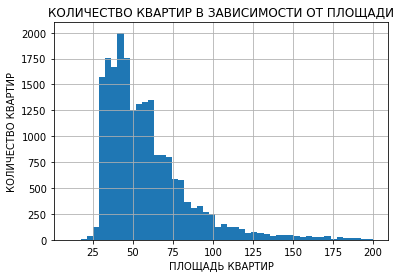

In [17]:
df['total_area'].hist(bins=50, range = (10,200))
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ПЛОЩАДЬ КВАРТИР')
plt.title('КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ПЛОЩАДИ');

###### Вывод: 
В основном львиная доля квартир приходится на квартиры площадью от 35 м2 до 75 м2

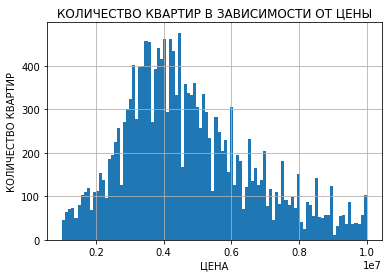

In [18]:
df['last_price'].hist(range =(10**6,  10**7), bins = 100)
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ЦЕНА')
plt.title('КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ЦЕНЫ');

###### Вывод:
Большая часть квартир оценивается в районе 4 мл. руб.Так же можно сказать что квартир дешевле меньше, нежели квартир по дороже.

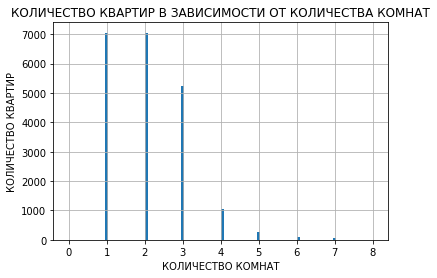

In [19]:
df['rooms'].hist(bins = 100, range = (0,8))
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('КОЛИЧЕСТВО КОМНАТ')
plt.title('КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ КОЛИЧЕСТВА КОМНАТ');

###### Вывод:
Большая часть квартир присутствующих на рынке это однокомнатные,двухкомнатные и трехкомнатные.

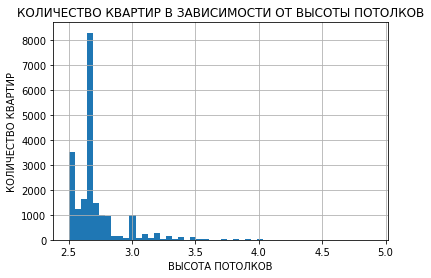

In [20]:
df['ceiling_height'].hist(bins = 50)
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ВЫСОТА ПОТОЛКОВ')
plt.title('КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ВЫСОТЫ ПОТОЛКОВ');

###### Вывод:
Большая часть квартир с высотой потолков 2.5 до 2.7 м.Что говорит нам о том что большая часть их построенна в конце 20,начале 21 века
Так же на рынке присутствуют небольшая часть квартир ("Сталинки") с высотой потолков от 3 метров и выше.

102.0
185.59988854834216


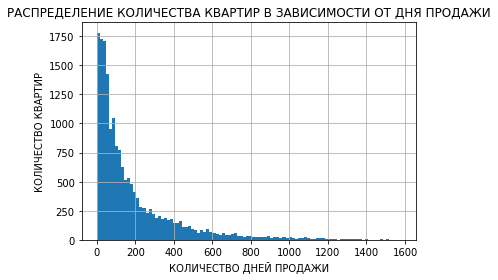

In [21]:
print(df['days_exposition'].median())
print(df['days_exposition'].mean())
df['days_exposition'].hist(bins = 100)
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('КОЛИЧЕСТВО ДНЕЙ ПРОДАЖИ')
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА КВАРТИР В ЗАВИСИМОСТИ ОТ ДНЯ ПРОДАЖИ');

###### Вывод:
- Как и предполагалось большая часть квартир раскупается в течении первого года.
- Те квартиры, объявления о продаже которых "висят" больше года, скорее всего либо слишком дорогие, либо заставляют нас задуматься о надежности этих предложений.

0.690467526323286


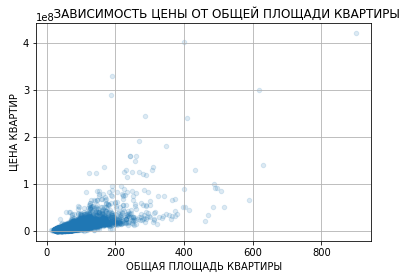

In [22]:
df.plot(x = 'total_area', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.15)
print(df['total_area'].corr(df['last_price']))
plt.ylabel('ЦЕНА КВАРТИР')
plt.xlabel('ОБЩАЯ ПЛОЩАДЬ КВАРТИРЫ')
plt.title('            ЗАВИСИМОСТЬ ЦЕНЫ ОТ ОБЩЕЙ ПЛОЩАДИ КВАРТИРЫ');

###### Вывод:
Как мы видим на графике есть прямая зависимость от общей площади к цене.Чем больше площадь, тем соответсвенно квартира дороже.

0.39108307972527495


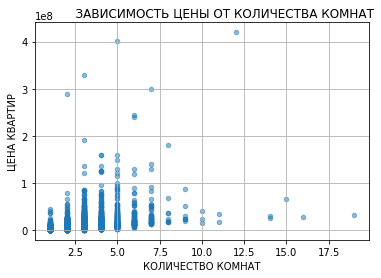

In [23]:
df.plot(x = 'rooms', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
print(df['rooms'].corr(df['last_price']))
plt.ylabel('ЦЕНА КВАРТИР')
plt.xlabel('КОЛИЧЕСТВО КОМНАТ')
plt.title('            ЗАВИСИМОСТЬ ЦЕНЫ ОТ КОЛИЧЕСТВА КОМНАТ');

###### Вывод:
Как и следовало ожидать чем больше в квартире комнат, тем больше цена на квартиру.За одним исключением: после отметки в 7 комнат цена на квартиры падает.Их конечно не много.Но мы может предположить,что эти квартиры скорее всего относятся к виду "комунальных",из_за большого количества комнат,что в свою очередь, содержит в себе много подводных камней,таких как:большое количетво собственников, состояние квартиры, год постройки дома и надежность постройки.
А это влияет на цену квартиры.

-0.20783687855375968


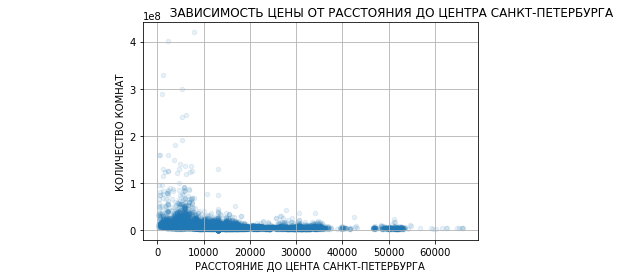

In [24]:
df.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.1)
print(df['cityCenters_nearest'].corr(df['last_price']))
plt.ylabel('КОЛИЧЕСТВО КОМНАТ')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТА САНКТ-ПЕТЕРБУРГА')
plt.title('                                          ЗАВИСИМОСТЬ ЦЕНЫ ОТ РАССТОЯНИЯ ДО ЦЕНТРА САНКТ-ПЕТЕРБУРГА');

###### Вывод:
На данном графике мы наблюдаем  следующее.Не большой всплеск цен на квартиры ближе к центру.Но дальше количетсво квартир с одинаковой цена примерно однаковое.По-моему мнению это обусловлено наличием метро в городе,что упрощает облегчает дорогу (к тому же центру) и рядом таких факторов как: наличие удобных дорожных путей к району,является ли район спальным, состояние домов (дома которые находятся дольше от центра скорее всего более новые).

In [25]:
print(df[df['floor_apartment'] == 'первый этаж']['last_price'].mean())
print(df[df['floor_apartment'] == 'последний этаж']['last_price'].mean())  
print(df[df['floor_apartment'] == 'середина дома']['last_price'].mean()) 
print(df[df['floor_apartment'] == 'предпоследниe этажи']['last_price'].mean())

4854657.281188119
6893895.02980576
6519558.138689765
7013414.13883606


###### Вывод:
Как и предполагалось средняя цена на квартиры на первом этаже ниже всех остальных предложений(холодные полы; возможность того что в квартиру могут обокрасть,и ввиду этого необходимость установки решеток на окна; шум c улицы).
Квартиры расположенные на остальных этаж дома не сильно отличаются по средней цене.
Хочется отметить что наиболее приквлекательными стоит считать квартиры расположенные на предпоследних этажах.

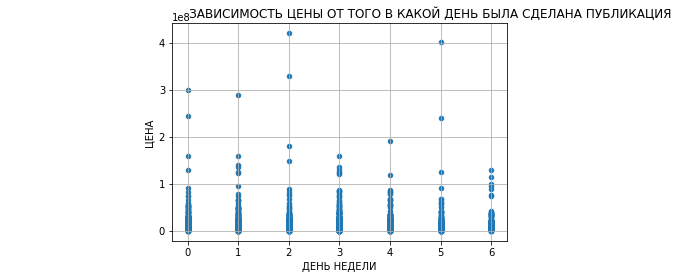

In [26]:
df.plot(x ='weekday_of_publication', kind = 'scatter', y = 'last_price', grid = True, legend = True, alpha = 1)
plt.ylabel('ЦЕНА')
plt.xlabel('ДЕНЬ НЕДЕЛИ')
plt.title('                                               ЗАВИСИМОСТЬ ЦЕНЫ ОТ ТОГО В КАКОЙ ДЕНЬ БЫЛА СДЕЛАНА ПУБЛИКАЦИЯ');

###### Вывод:
Цена на квартиру не зависит от того в какой день была сделана публикация объявления.

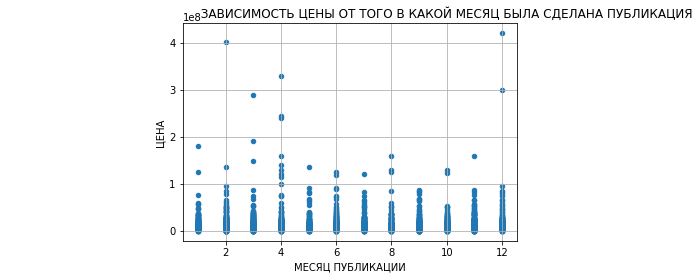

In [27]:
df.plot(x ='month_of_publication', y='last_price', kind ='scatter', grid = True, legend = True, alpha = 1)
plt.ylabel('ЦЕНА')
plt.xlabel('МЕСЯЦ ПУБЛИКАЦИИ')
plt.title('                                                  ЗАВИСИМОСТЬ ЦЕНЫ ОТ ТОГО В КАКОЙ МЕСЯЦ БЫЛА СДЕЛАНА ПУБЛИКАЦИЯ');

###### Вывод:
Так же цена на квартиру не зависит от того в каком месяце была сделана публикация объявления.

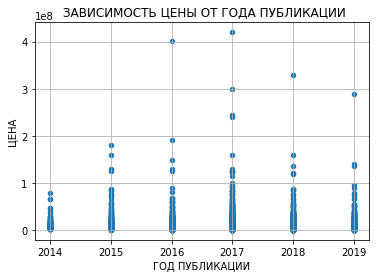

In [28]:
df.plot(x ='year_of_publication', y='last_price', kind ='scatter', grid = True, legend = True, alpha = 1)
plt.ylabel('ЦЕНА')
plt.xlabel('ГОД ПУБЛИКАЦИИ')
plt.title(' ЗАВИСИМОСТЬ ЦЕНЫ ОТ ГОДА ПУБЛИКАЦИИ');

###### Вывод:
И опять же цена на квартиру не зависит от того в каком году была сделана публикация объявления.
Стоит отметить 2014 год, акцентируя внимание на том, что цена не значитльно отличается от следующих годов.

###### Выберем 10 населённых пунктов с наибольшим числом объявлений.Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [29]:
cities = df.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count','median'])
cities.columns = ['count','median']
top_10_cities = cities.sort_values(by ='count',ascending = False ).head(10)
print(top_10_cities)

                   count         median
locality_name                          
Санкт-Петербург    13986  104226.805403
посёлок Мурино       401   84968.750000
посёлок Шушары       392   77223.320158
Всеволожск           356   65811.403509
Пушкин               335  100000.000000
Колпино              321   74725.274725
Гатчина              290   67746.286082
посёлок Парголово    287   92282.051282
деревня Кудрово      226   91715.116279
Петергоф             190   81901.425762


###### Вывод:
- Как и стоило ожидать Санкт-Петербург лидирует по количеству объявлений и по средней цене за один квадратный метр.
- Меньше всего объявлений в Петергофе.
- Населеные пункты с самой маленькой ценой за один квадратный метр это Всеволожск и Гатчина.

###### Выясним, какая область входит в центр и определим зависимость цены от расстояния до центра.

Для начала создадим столбец,в котором указано расстояние до центра в километрах.

In [30]:
df_spb= df[df['locality_name']=='Санкт-Петербург']

Создадим столбец с расстоянием до центра в киллометрах,и округленным до целых значений.

In [31]:
df_spb['distance_in_kilometers']= df_spb['cityCenters_nearest']/1000
df_spb['distance_in_kilometers']=df_spb['distance_in_kilometers'].astype('int')

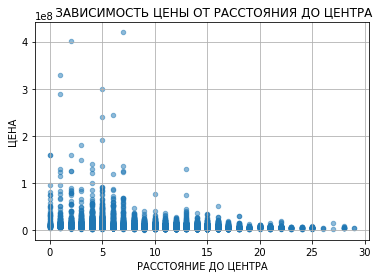

In [32]:
df_spb.plot(x ='distance_in_kilometers', y='last_price', kind ='scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА')
plt.title('      ЗАВИСИМОСТЬ ЦЕНЫ ОТ РАССТОЯНИЯ ДО ЦЕНТРА');

###### Вывод: 
Исходя из графика можно предположить что к центральной части города Санкт-Петербург
можно отнести область радиусом 7 км.

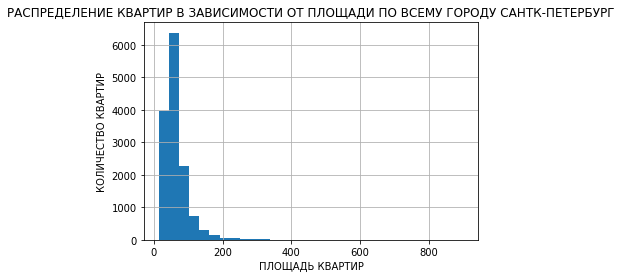

In [33]:
df_spb['total_area'].hist(bins=30)
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ПЛОЩАДЬ КВАРТИР')
plt.title('РАСПРЕДЕЛЕНИЕ КВАРТИР В ЗАВИСИМОСТИ ОТ ПЛОЩАДИ ПО ВСЕМУ ГОРОДУ САНТК-ПЕТЕРБУРГ');

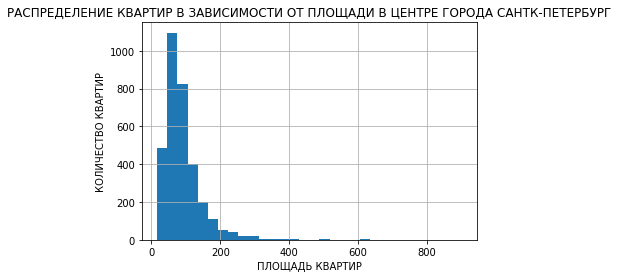

In [34]:
df_spb_center=df_spb[df_spb['distance_in_kilometers'] <= 7]
df_spb_center['total_area'].hist(bins=30)
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ПЛОЩАДЬ КВАРТИР')
plt.title('РАСПРЕДЕЛЕНИЕ КВАРТИР В ЗАВИСИМОСТИ ОТ ПЛОЩАДИ В ЦЕНТРЕ ГОРОДА САНТК-ПЕТЕРБУРГ');

###### Вывод:
- Как в центре так и по всему городу большая часть квартир это квартиры с площадью в райне 60-70 м2.
- Единственное в чем есть отличие центральной области от всего города:
- В центре больше квартир с общей площадью больше 100 м2.

Выделим сегмент квартир в центре и в обшем по городу.
Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

--------------------------------------САНКТ-ПЕТЕРБУРГ----------------------------------------------


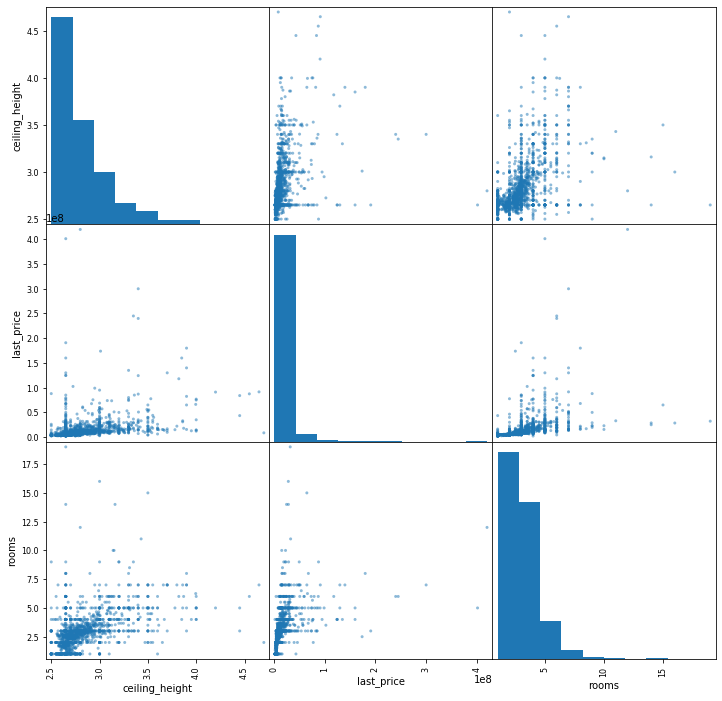

In [35]:
print('--------------------------------------САНКТ-ПЕТЕРБУРГ----------------------------------------------')
df_spb1=df_spb.pivot_table(index ='total_area',  values = ['last_price','rooms','ceiling_height'])
pd.plotting.scatter_matrix(df_spb1, figsize=(12, 12));

-------------------------------------Центр (САНКТ-ПЕТЕРБУРГ)---------------------------------------


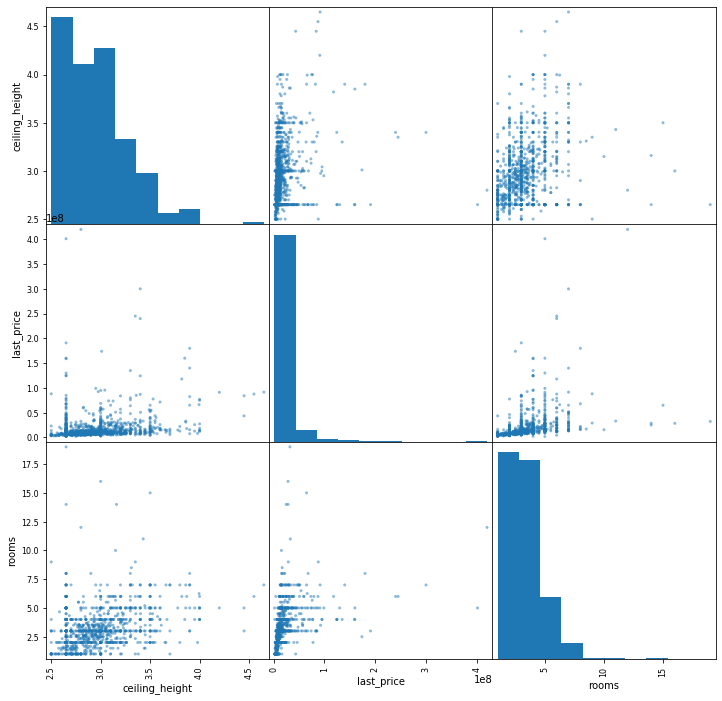

In [36]:
print('-------------------------------------Центр (САНКТ-ПЕТЕРБУРГ)---------------------------------------')
df_spb_center1=df_spb_center.pivot_table(index= 'total_area', values = ['last_price','rooms','ceiling_height'])
pd.plotting.scatter_matrix(df_spb_center1, figsize=(12, 12));

###### Вывод: 
- Как и в случаем с общей площадью квартир, в центре больше квартир с высокими потолками и с большим количетсвом комнат.
Скорее всего это из-за того что в центре больше "Сталинок" и вообще квартир старых построек, с более просторной планировкой.
- Что же касается соотношения остальных показателей между собой, то они в целом одинаковы.

Также проанализируем зависимость факторов, которые влияют на стоимость квартиры:число комнат, этаж, удалённость от центра, дата размещения объявления.

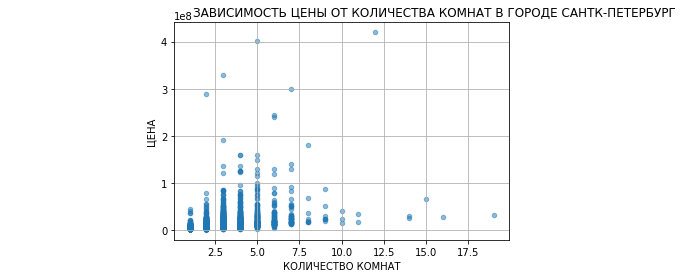

In [37]:
df_spb.plot(x = 'rooms', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('КОЛИЧЕСТВО КОМНАТ')
plt.title('                                                ЗАВИСИМОСТЬ ЦЕНЫ ОТ КОЛИЧЕСТВА КОМНАТ В ГОРОДЕ САНТК-ПЕТЕРБУРГ');

In [38]:
print(df_spb['rooms'].corr(df_spb['last_price']))

0.39877943285837125


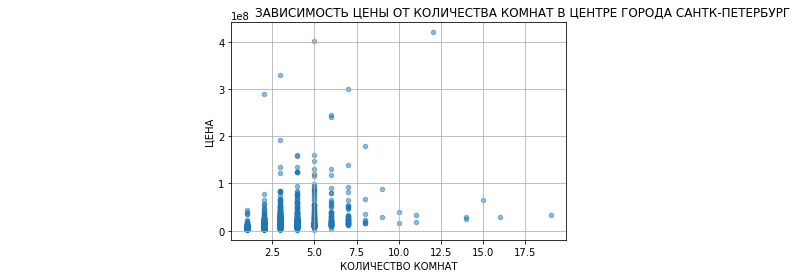

In [39]:
df_spb_center.plot(x = 'rooms', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('КОЛИЧЕСТВО КОМНАТ')
plt.title('                                                                ЗАВИСИМОСТЬ ЦЕНЫ ОТ КОЛИЧЕСТВА КОМНАТ В ЦЕНТРЕ ГОРОДА САНТК-ПЕТЕРБУРГ');

In [40]:
print(df_spb_center['rooms'].corr(df_spb_center['last_price']))

0.3517294026954176


###### Вывод:
Если говорить о соотношении стоимости квартиры к числу комнат - то в целом оно одинаково для центра и всего города 

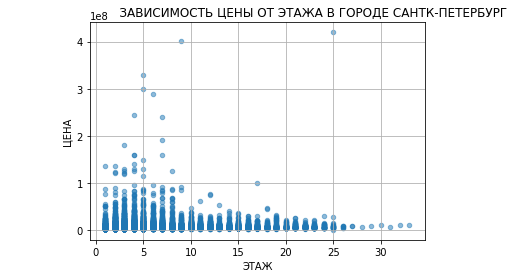

In [41]:
df_spb.plot(x = 'floor', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('ЭТАЖ')
plt.title('                             ЗАВИСИМОСТЬ ЦЕНЫ ОТ ЭТАЖА В ГОРОДЕ САНТК-ПЕТЕРБУРГ');

In [42]:
print(df_spb['floor'].corr(df_spb['last_price']))

0.0008090494932588438


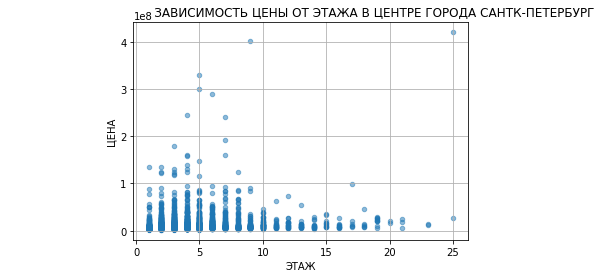

In [43]:
df_spb_center.plot(x = 'floor', y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('ЭТАЖ')
plt.title('                                      ЗАВИСИМОСТЬ ЦЕНЫ ОТ ЭТАЖА В ЦЕНТРЕ ГОРОДА САНТК-ПЕТЕРБУРГ');

In [44]:
print(df_spb_center['floor'].corr(df_spb_center['last_price']))

0.1259089662719922


###### Вывод:
Если говорить и соотношении этаж квартиры и цена - то тут можно отметить разницу в количестве предложений квартир в высотных домах
и так же то что зависимость цены от этажа немного больше в центре чем по всему городу.

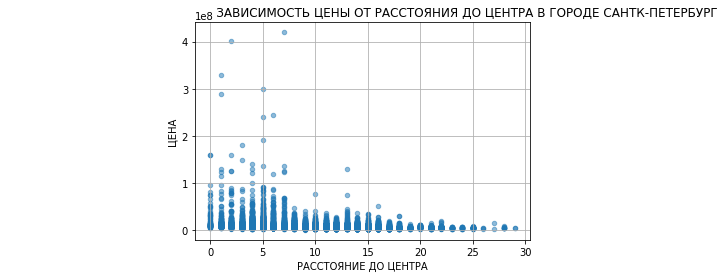

In [45]:
df_spb.plot(x = 'distance_in_kilometers' , y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА')
plt.title('                                                      ЗАВИСИМОСТЬ ЦЕНЫ ОТ РАССТОЯНИЯ ДО ЦЕНТРА В ГОРОДЕ САНТК-ПЕТЕРБУРГ');

In [46]:
print(df_spb['distance_in_kilometers'].corr(df_spb['last_price']))

-0.2813830564535343


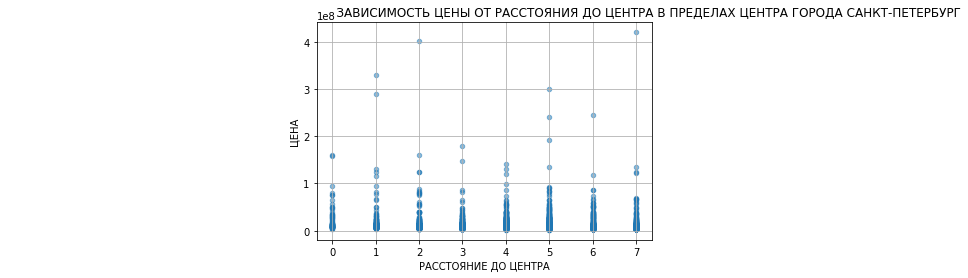

In [47]:
df_spb_center.plot(x = 'distance_in_kilometers' , y = 'last_price', kind = 'scatter', grid = True, legend = True, alpha = 0.5)
plt.ylabel('ЦЕНА')
plt.xlabel('РАССТОЯНИЕ ДО ЦЕНТРА')
plt.title('                                                                                     ЗАВИСИМОСТЬ ЦЕНЫ ОТ РАССТОЯНИЯ ДО ЦЕНТРА В ПРЕДЕЛАХ ЦЕНТРА ГОРОДА САНКТ-ПЕТЕРБУРГ')
plt.show();

In [48]:
print(df_spb_center['distance_in_kilometers'].corr(df_spb_center['last_price']))

-0.06337845342727448


###### Вывод:
В центре разница между расстоянием и ценой не большая на каждом киллометре.Так как по всему городу другая картина: чем дальше от центра тем меньше цена за квартиру.

##### Зависимость цены от дня недели, месяца и года публицации (Санкт-Петербург)

In [49]:
print(df_spb['year_of_publication'].corr(df_spb['last_price']))
print(df_spb['month_of_publication'].corr(df_spb['last_price']))
print(df_spb['weekday_of_publication'].corr(df_spb['last_price']))

-0.04553192680743848
-0.004912368381593921
-0.004219359886377838


###### Зависимость цены от дня недели, месяца и года публицации (Санкт-Петербург - ЦЕНТР)

In [50]:
print(df_spb_center['year_of_publication'].corr(df_spb_center['last_price']))
print(df_spb_center['month_of_publication'].corr(df_spb_center['last_price']))
print(df_spb_center['weekday_of_publication'].corr(df_spb_center['last_price']))

-0.03994415907158998
-0.019957607351669075
0.0023126679938766967


###### Вывод:
Что же касается зависимости цены от дня недели, месяца и года можно сделать вывод что нет никакой разницы в какой день,месяц и год продавать квартиру.

### 5) Общий вывод.
 Первое на что можно и нужно обратить внимание при открытий файла и его изучении это наличие пропусков,аномалии,тип данных в столбцах.В нашем проекте все указанные "проблемы" как оказалось присутствуют.Это дает нам возможность предполагать, что скорее всего данные были заполнены владельцами квартир не корректно.А так же что выгрузка данных прошла не в полной мере хорошо.
 Приведя нужную предобработку данных и исследовательский анализ можно сделать следующие выводы:
- 1) Количество предложений в Санкт-Петербурге больше чем в прилегающих районах и близлежайших населенных пунктах.
- 2) Цена квартиры существенно зависит от количества комнат, этажа,общей площади, высоты потолков,расстояния от центра города Санкт-Петербург.
- 3) Средняя высота потолков в большинстве квартир колеблится от 2.5 до 3 м.
- 4) Среднее количетсво комнат в квартирах: 1,2 и 3 комнаты
- 5) Центральным районом Санкт-Петербурга принято считать область радиусом 7 км.
- 6) Средняя цена квартир в Санкт-Петербурге колеблится от 2 млн. до 8 млн. рублей 
- 7) Цена квартиры не зависит от дня недели,месяца и года публикации.


Что же касается нашей осовной задачи, то я считаю что параметров полученных при нашем исследовании должно хватит для создания автоматизированной системы.Она позволит нам выявлять аномалии и мошенническую деятельность. 